STUDI KASUS: PREDIKSI SURVIVAL TITANIC MENGGUNAKAN DECISION TREE

[1] LOADING DAN EKSPLORASI DATA
--------------------------------------------------------------------------------
Dataset berhasil dimuat. Shape: (891, 15)

Jumlah baris: 891
Jumlah kolom: 15

5 Data Pertama:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  

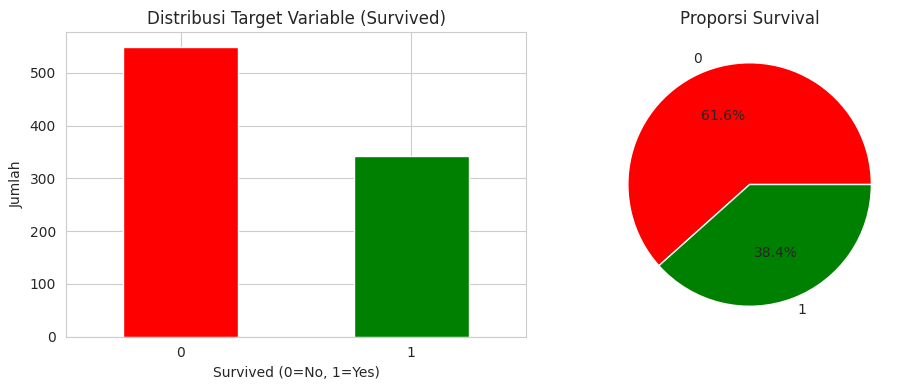


Proporsi Survival:
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


[2] PREPROCESSING DATA
--------------------------------------------------------------------------------
Fitur yang digunakan: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
Target variable: survived

2.1 Handling Missing Values
Missing values sebelum handling:
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
survived      0
dtype: int64

Missing values setelah handling:
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

2.2 Encoding Categorical Variables
Sex encoding: {'female': np.int64(0), 'male': np.int64(1)}

Fitur setelah encoding:
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived', 'embarked_Q', 'embarked_S']

Shape X: (891, 8)
Shape y: (891,)


[3] SPLITTING DATA
----------------------------------------------------------------

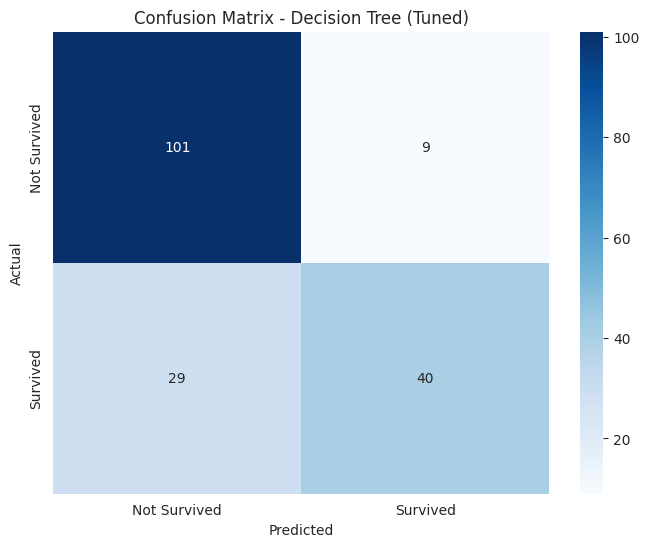



Perbandingan Semua Model
                   Accuracy  Precision    Recall  F1-Score
DT Default         0.821229   0.793651  0.724638  0.757576
DT Tuned           0.787709   0.816327  0.579710  0.677966
Random Forest      0.798883   0.811321  0.623188  0.704918
Gradient Boosting  0.787709   0.762712  0.652174  0.703125


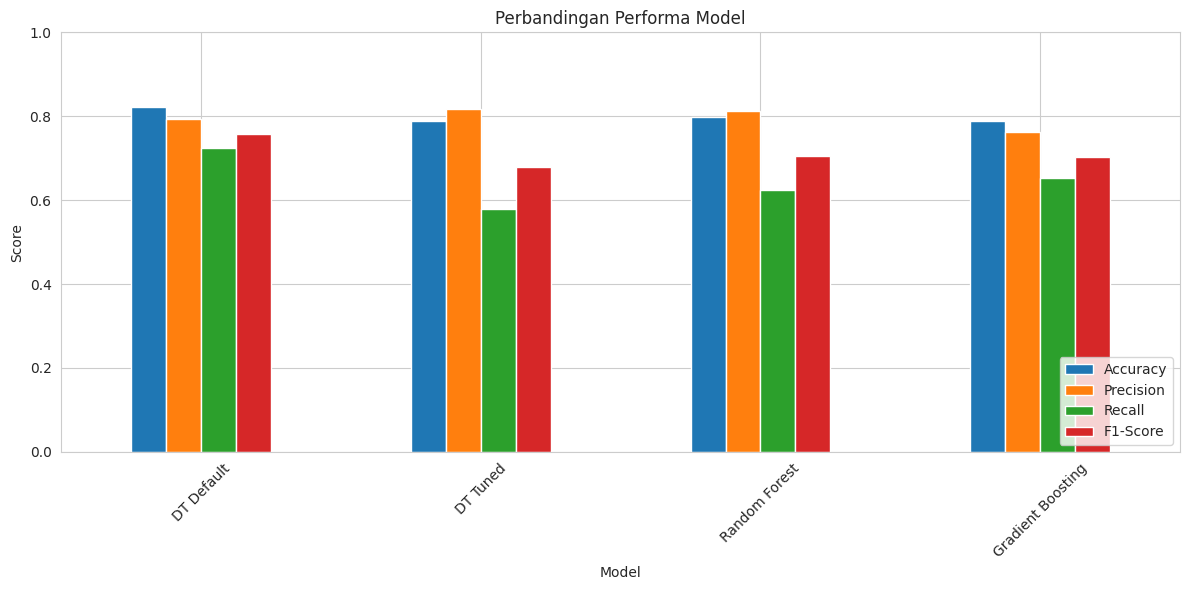



[6] VISUALISASI DECISION TREE
--------------------------------------------------------------------------------


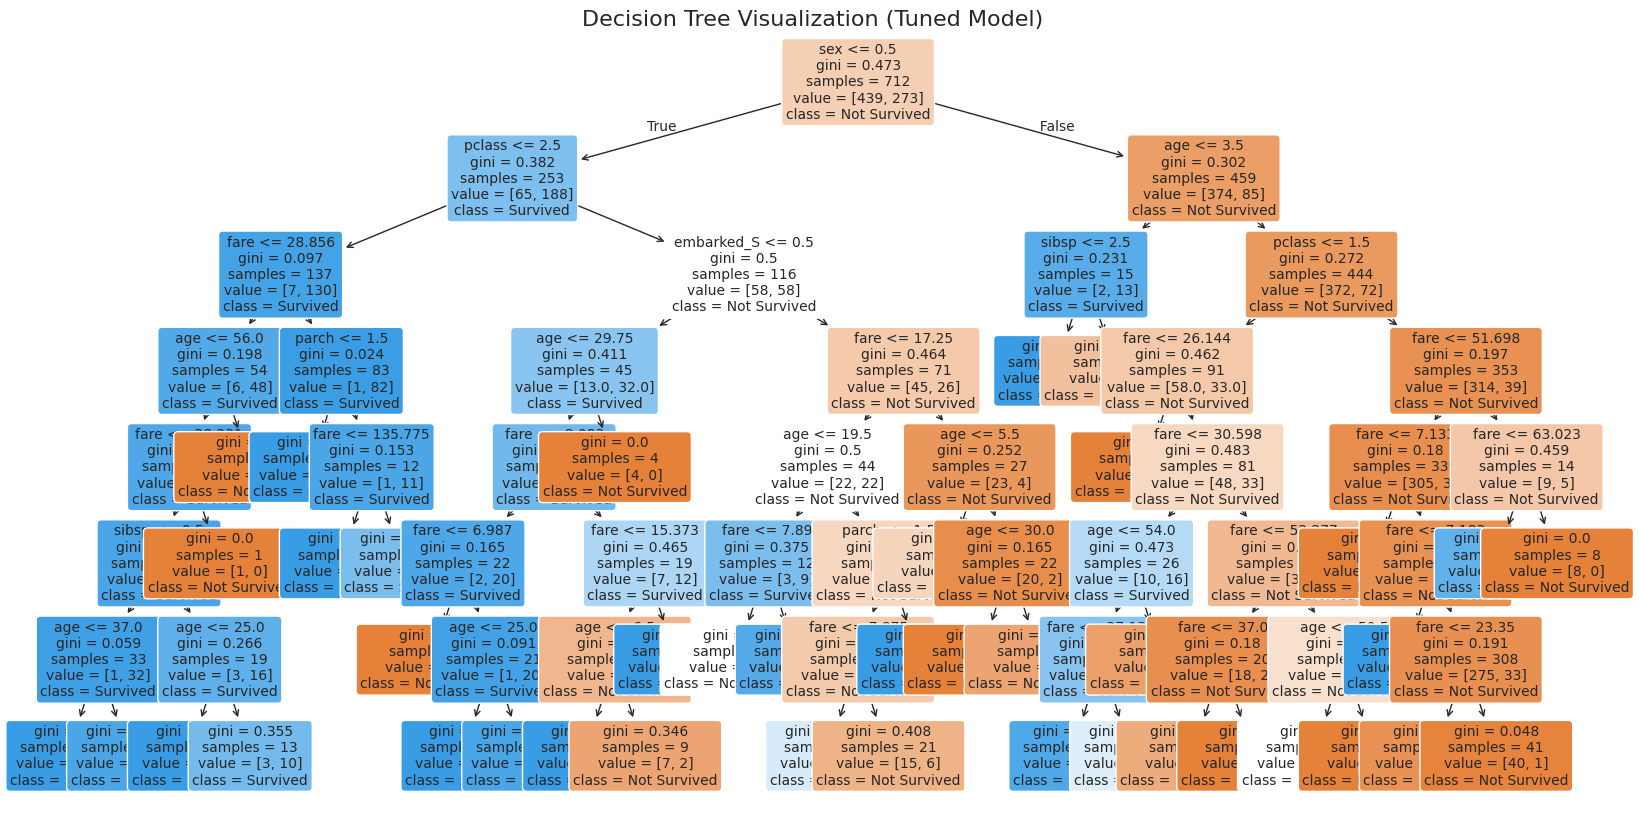

Decision tree berhasil divisualisasikan dan disimpan!


Feature Importance - Decision Tree (Tuned)
--------------------------------------------------------------------------------
      Feature  Importance
1         sex    0.475951
5        fare    0.172366
0      pclass    0.161806
2         age    0.139596
7  embarked_S    0.030721
3       sibsp    0.011841
4       parch    0.007720
6  embarked_Q    0.000000


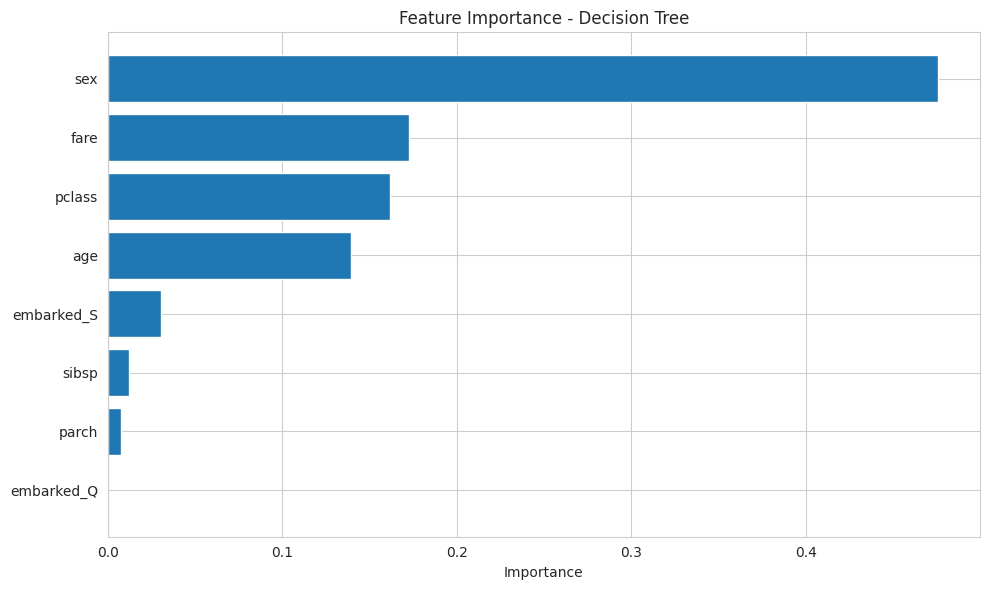



KESIMPULAN

1. Model terbaik: DT Default
   - Accuracy: 0.8212

2. Parameter terbaik Decision Tree:
   - criterion: gini
   - max_depth: 7
   - min_samples_leaf: 1
   - min_samples_split: 10

3. Fitur paling penting:
   - sex: 0.4760
   - fare: 0.1724
   - pclass: 0.1618

4. Kelebihan tree-based methods pada kasus ini:
   - Mudah diinterpretasi dan divisualisasikan
   - Dapat menangani fitur kategorikal dan numerikal
   - Tidak memerlukan feature scaling
   - Dapat menangkap non-linear relationships
   - Feature importance membantu memahami faktor survival

5. Hasil akhir:
   Decision Tree berhasil memprediksi survival dengan accuracy 82.12%
   Fitur 'sex', 'pclass', dan 'age' merupakan faktor paling berpengaruh

ANALISIS SELESAI


In [1]:
# Studi Kasus: Decision Tree untuk Prediksi Survival Titanic
# Tugas UAS - Machine Learning

# =============================================================================
# IMPORT LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("STUDI KASUS: PREDIKSI SURVIVAL TITANIC MENGGUNAKAN DECISION TREE")
print("="*80)

# =============================================================================
# BAGIAN 1: LOAD DAN EKSPLORASI DATA (EDA)
# =============================================================================
print("\n[1] LOADING DAN EKSPLORASI DATA")
print("-"*80)

# Load dataset Titanic dari seaborn
df = sns.load_dataset('titanic')
print(f"Dataset berhasil dimuat. Shape: {df.shape}")
print(f"\nJumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Tampilkan 5 data pertama
print("\n5 Data Pertama:")
print(df.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Cek missing values
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Visualisasi distribusi target
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribusi Target Variable (Survived)')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Proporsi Survival')
plt.ylabel('')
plt.tight_layout()
plt.savefig('eda_survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nProporsi Survival:")
print(df['survived'].value_counts(normalize=True))

# =============================================================================
# BAGIAN 2: PREPROCESSING DATA
# =============================================================================
print("\n\n[2] PREPROCESSING DATA")
print("-"*80)

# Pilih fitur yang akan digunakan
selected_features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

# Buat copy dataset
data = df[selected_features + [target]].copy()

print(f"Fitur yang digunakan: {selected_features}")
print(f"Target variable: {target}")

# Handle missing values
print("\n2.1 Handling Missing Values")
print(f"Missing values sebelum handling:")
print(data.isnull().sum())

# Isi missing value age dengan median
data['age'].fillna(data['age'].median(), inplace=True)

# Isi missing value embarked dengan modus
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Drop baris dengan missing fare (hanya sedikit)
data.dropna(subset=['fare'], inplace=True)

print(f"\nMissing values setelah handling:")
print(data.isnull().sum())

# Encoding categorical variables
print("\n2.2 Encoding Categorical Variables")

# Label encoding untuk 'sex'
le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])
print(f"Sex encoding: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")

# One-hot encoding untuk 'embarked'
data = pd.get_dummies(data, columns=['embarked'], prefix='embarked', drop_first=True)

print(f"\nFitur setelah encoding:")
print(data.columns.tolist())

# Pisahkan fitur dan target
X = data.drop('survived', axis=1)
y = data['survived']

print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")

# =============================================================================
# BAGIAN 3: SPLIT DATA
# =============================================================================
print("\n\n[3] SPLITTING DATA")
print("-"*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nProporsi kelas di training set:")
print(y_train.value_counts(normalize=True))
print(f"\nProporsi kelas di testing set:")
print(y_test.value_counts(normalize=True))

# =============================================================================
# BAGIAN 4: MEMBANGUN MODEL DECISION TREE
# =============================================================================
print("\n\n[4] MEMBANGUN MODEL DECISION TREE")
print("-"*80)

# Model 1: Decision Tree dengan default parameters
print("\n4.1 Decision Tree - Default Parameters")
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

y_pred_default = dt_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy (default): {acc_default:.4f}")

# Model 2: Decision Tree dengan parameter tuning
print("\n4.2 Decision Tree - Hyperparameter Tuning")

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Model terbaik
dt_best = grid_search.best_estimator_
y_pred_best = dt_best.predict(X_test)

# Model 3: Random Forest untuk perbandingan
print("\n4.3 Random Forest - Perbandingan")
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model 4: Gradient Boosting untuk perbandingan
print("4.4 Gradient Boosting - Perbandingan")
gb = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# =============================================================================
# BAGIAN 5: EVALUASI MODEL
# =============================================================================
print("\n\n[5] EVALUASI MODEL")
print("="*80)

def evaluate_model(y_true, y_pred, model_name):
    """Fungsi untuk evaluasi model"""
    print(f"\n{model_name}")
    print("-"*80)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    print(f"\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Not Survived', 'Survived']))

    return acc, prec, rec, f1

# Evaluasi semua model
metrics = {}
metrics['DT Default'] = evaluate_model(y_test, y_pred_default, "Decision Tree (Default)")
metrics['DT Tuned'] = evaluate_model(y_test, y_pred_best, "Decision Tree (Tuned)")
metrics['Random Forest'] = evaluate_model(y_test, y_pred_rf, "Random Forest")
metrics['Gradient Boosting'] = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# Confusion Matrix untuk model terbaik
print("\n\nConfusion Matrix - Decision Tree (Tuned)")
print("-"*80)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Perbandingan model
print("\n\nPerbandingan Semua Model")
print("="*80)
comparison_df = pd.DataFrame(metrics,
                             index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
print(comparison_df)

# Visualisasi perbandingan
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Perbandingan Performa Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# BAGIAN 6: VISUALISASI DECISION TREE
# =============================================================================
print("\n\n[6] VISUALISASI DECISION TREE")
print("-"*80)

plt.figure(figsize=(20, 10))
plot_tree(dt_best,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization (Tuned Model)', fontsize=16)
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("Decision tree berhasil divisualisasikan dan disimpan!")

# Feature Importance
print("\n\nFeature Importance - Decision Tree (Tuned)")
print("-"*80)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_best.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# BAGIAN 7: KESIMPULAN
# =============================================================================
print("\n\n" + "="*80)
print("KESIMPULAN")
print("="*80)

best_model_name = comparison_df['Accuracy'].idxmax()
best_accuracy = comparison_df['Accuracy'].max()

print(f"\n1. Model terbaik: {best_model_name}")
print(f"   - Accuracy: {best_accuracy:.4f}")

print(f"\n2. Parameter terbaik Decision Tree:")
for param, value in grid_search.best_params_.items():
    print(f"   - {param}: {value}")

print(f"\n3. Fitur paling penting:")
for idx, row in feature_importance.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n4. Kelebihan tree-based methods pada kasus ini:")
print("   - Mudah diinterpretasi dan divisualisasikan")
print("   - Dapat menangani fitur kategorikal dan numerikal")
print("   - Tidak memerlukan feature scaling")
print("   - Dapat menangkap non-linear relationships")
print("   - Feature importance membantu memahami faktor survival")

print("\n5. Hasil akhir:")
print(f"   Decision Tree berhasil memprediksi survival dengan accuracy {best_accuracy:.2%}")
print(f"   Fitur 'sex', 'pclass', dan 'age' merupakan faktor paling berpengaruh")

print("\n" + "="*80)
print("ANALISIS SELESAI")
print("="*80)